# Showcase the EarthDaily Simulated dataset

This notebook illustrates how to use the EarthDaily Simulated dataset to generate a field level datacube that will use to generate a vegetation index evolution animation highlighting new capabilities enabled by daily imagery.

For this example the data cube has been generated using https://github.com/GEOSYS/earthdaily-data-processor with the following parameters:
- Geometry: "POLYGON ((-96.444476707042 41.18311650256777, -96.4347884854818 41.18295356510254, -96.43489673376754 41.176069086814266, -96.4445308311847 41.176028348103074, -96.44436845875661 41.17879852277147, -96.444476707042 41.18311650256777))"
- Collection: earthdaily-simulated-cloudless-l2a-cog-edagro
- Dates: 2019-05-01 to 2019-05-31
- Assets: red, green, blue

In [1]:
import sys
import os
sys.path.append(os.path.join('..','src'))
from geosyspy.utils.constants import *
from dotenv import load_dotenv
load_dotenv()
import xarray as xr
from geogif import dgif
from earthdaily_data_processor.utils import open_cube_azure

## 1️⃣ Open EarthDaily simulated dataset

- Load Datacube from Azure Cloud Storage

In [2]:
image = '2019-05-01_2019-05-31_EDdataset_earthdaily-simulated-cloudless-l2a-cog-edagro_datacube.zarr'
cube = open_cube_azure(image)

In [3]:
cube

<xarray.Dataset>
Dimensions:      (time: 30, y: 82, x: 85)
Coordinates:
    spatial_ref  int32 ...
  * time         (time) datetime64[ns] 2019-05-01T10:42:14 ... 2019-05-30T10:...
  * x            (x) float64 2.111e+05 2.111e+05 ... 2.119e+05 2.119e+05
  * y            (y) float64 4.565e+06 4.565e+06 ... 4.564e+06 4.564e+06
Data variables:
    blue         (time, y, x) float64 dask.array<chunksize=(1, 82, 85), meta=np.ndarray>
    green        (time, y, x) float64 dask.array<chunksize=(1, 82, 85), meta=np.ndarray>
    red          (time, y, x) float64 dask.array<chunksize=(1, 82, 85), meta=np.ndarray>

 ## 2️⃣ Plot one year of data

In [4]:
datacube = cube[["red", "green", "blue"]].to_array()/10000
datacube = datacube.rename({'variable':'band'})
datacube = datacube.transpose('time','band','y','x')

In [5]:
result_animated = dgif(datacube,date_format=None).compute()
scale = 20
result_animated.height = int(datacube.shape[3] * scale)
result_animated.width = int(datacube.shape[2] * scale)

c:\Users\lwh\AppData\Local\miniforge3\envs\earthdaily-proc\lib\site-packages\geogif\gif.py:190: RuntimeWarning: invalid value encountered in cast
  u8 = (data * 255).astype("uint8")


Animation of the EarthDaily Simulated dataset between May 1st 2019 and May 29st 2020


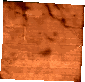

In [6]:
print('Animation of the EarthDaily Simulated dataset between May 1st 2019 and May 29st 2020')
result_animated